In [1]:
import requests
import pandas as pd
import re
import bs4
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
link = 'https://www.numbeo.com/cost-of-living/in/Hyderabad'
col=requests.get(link)
col
col.text
col_soup=BeautifulSoup(col.text)
col_soup
col_souplabel=col_soup.find_all('td',{'class':'tr_highlighted'})
col_souplabel
columns=[]
for i in col_souplabel:
    #print(i.text)
    data=i.text
    val=re.findall(r'(?!Rs)\w[a-zA-Z]+',data)
    columns.append(''.join(val))
columns    
columns = list(filter(lambda x: x.strip(),columns))
print(len(columns))


26


In [3]:
cities=['Agartala-India','Agra','Ahmedabad','Aizawl-India','Ajmer-India','Akola-India','Allahabad-India','Alwar-India','Amravati','Amritsar','Anand-India','Anantapur-India','Asansol-India','Aurangabad','Balasore-India','Bangalore','Bathinda-India','Belgaum','Berhampur-India','Bhagalpur-India','Bharuch','Bhavnagar-India','Bhilai-India','Bhiwadi-India','Bhopal','Bhubaneswar','Bikaner-India','Bilaspur-India','Bokaro-India','Bongaigaon-India','Chandigarh','Chennai','Chittoor-India','Coimbatore','Davanagere-Davangere-India','Dehradun','Delhi','Dhanbad-India','Dharamsala-India','Dharwad-India','Dimapur-India','Durgapur-India','Eluru-India','Ernakulam','Erode-India','Faridabad','Gandhinagar-India','Gangtok-Sikkim-India','Ghaziabad','Goa','Gujarat','Gulbarga-India','Guntur','Gurgaon','Guwahati','Gwalior-India','Haldwani-India','Haridwar-India','Hisar-India','Hosur','Haora-India','Hubli','Hyderabad','Imphal-India','Indore','Jabalpur','Jaipur','Jalandhar','Jalgaon-India','Jammu','Jamnagar','Jamshedpur','Jodhpur','Jorhat-India','Kakinada-India','Kalyan','Kanpur','Kharagpur-India','Kochi','Kolhapur','Kolkata','Kollam','Kota-India','Kottayam-India','Kozhikode-Calicut','Kurnool-India','Latur-India','Lucknow-Lakhnau','Ludhiana','Madras-India','Madurai','Malappuram-India','Mangalore','Manipal-India','Mathura-Uttar-Pradesh-India','Meerut','Mumbai','Moradabad-India','Muzaffarpur-India','Mysore','Nagercoil','Nagpur','Nalgonda-India','Nanded-India','Nashik-India','Nasik','Navi-Mumbai','Navsari-India','Nellore']

In [4]:
df_costofliving=pd.DataFrame()

for n in cities:
    url = "https://www.numbeo.com/cost-of-living/in/{}".format(n)
    pol = requests.get(url)
    soup = BeautifulSoup(pol.text)
    price_souplabel=soup.find_all('td',{'class':'priceValue tr_highlighted'})
    price_souplabel
    prices=[]
    prices2=[]
    for j in price_souplabel:
        data=j.text
        prices.append(''.join(data))

    for k in range(len(prices)):
        b=prices[k].replace('\xa0Rs','')
        c= re.sub(',','',b)
        prices2.append(''.join(c))

    prices2=list(filter(lambda x: x.strip(),prices2))
    
    [float(i) for i in range(len(prices2))]
    df_costofliving[n]=prices2

df_costofliving=df_costofliving.T
df_costofliving.columns=columns
len(df_costofliving)


109

In [5]:
df_costofliving.isnull()

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Agartala-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Agra,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ahmedabad,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Aizawl-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Ajmer-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Akola-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Allahabad-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Alwar-India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Amravati,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Amritsar,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for i in (df_costofliving.columns):
    df_costofliving[i] = pd.to_numeric(df_costofliving[i],errors='coerce')
df_costofliving.info()
df_costofliving.to_csv('costofliving.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Agartala-India to Nellore
Data columns (total 26 columns):
MealforPeopleMidrangeRestaurantThreecourse                  109 non-null float64
DomesticBeerliterdraught                                    109 non-null float64
Cappuccinoregular                                           107 non-null float64
Waterliterbottle                                            109 non-null float64
LoafofFreshWhiteBread0g                                     108 non-null float64
Eggsregular                                                 108 non-null float64
ChickenBreastsBonelessSkinless1kg                           109 non-null float64
Apples1kg                                                   109 non-null float64
Oranges1kg                                                  108 non-null float64
Potato1kg                                                   109 non-null float64
Lettucehead                                                 103 non-null 

In [7]:
df_costofliving.describe()

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
count,109.000000,109.000000,107.000000,109.000000,108.000000,108.000000,109.000000,109.000000,108.000000,109.000000,...,1.030000e+02,106.000000,92.000000,101.000000,106.000000,108.000000,106.000000,108.000000,91.000000,103.000000
mean,601.605505,125.957156,102.505701,13.665963,29.024259,64.183056,219.146789,128.464312,64.445093,22.791651,...,1.551974e+06,0.849151,505.898478,106858.293168,2232.285472,2405.046944,5412.229528,12179.322222,46906.365055,9.441942
std,171.151980,30.557018,30.166001,2.497724,4.208508,11.095570,45.096921,24.644729,18.788414,5.782413,...,1.920559e+05,0.114992,229.232771,31764.019779,575.195583,512.413668,2299.520607,5410.017200,33118.875683,0.820514
min,300.000000,75.000000,30.000000,5.000000,20.000000,46.750000,80.000000,74.000000,20.000000,13.330000,...,8.500000e+05,0.450000,0.000000,36000.000000,1200.000000,600.000000,1500.000000,4750.000000,9000.000000,5.000000
25%,500.000000,100.000000,88.200000,12.000000,26.627500,60.000000,193.000000,112.220000,57.500000,20.000000,...,1.525304e+06,0.772500,365.280000,86000.000000,1750.000000,2219.800000,4171.877500,9312.497500,28522.035000,9.190000
50%,575.000000,125.000000,100.000000,14.000000,29.300000,62.165000,211.670000,126.000000,60.000000,21.100000,...,1.596200e+06,0.850000,500.000000,100851.850000,2135.430000,2382.955000,5000.000000,11092.500000,39027.820000,9.340000
75%,700.000000,150.000000,115.330000,15.000000,30.720000,65.557500,246.670000,142.500000,71.520000,25.400000,...,1.627000e+06,0.940000,600.000000,123333.330000,2535.115000,2572.322500,6333.330000,14000.000000,49485.760000,9.775000
max,1200.000000,287.500000,324.000000,20.000000,40.000000,150.000000,500.000000,215.000000,150.000000,45.000000,...,2.300000e+06,1.100000,1425.000000,202916.670000,4500.000000,5000.000000,19283.950000,46756.100000,189233.700000,12.000000


In [8]:
df_costofliving.describe()

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
count,109.000000,109.000000,107.000000,109.000000,108.000000,108.000000,109.000000,109.000000,108.000000,109.000000,...,1.030000e+02,106.000000,92.000000,101.000000,106.000000,108.000000,106.000000,108.000000,91.000000,103.000000
mean,601.605505,125.957156,102.505701,13.665963,29.024259,64.183056,219.146789,128.464312,64.445093,22.791651,...,1.551974e+06,0.849151,505.898478,106858.293168,2232.285472,2405.046944,5412.229528,12179.322222,46906.365055,9.441942
std,171.151980,30.557018,30.166001,2.497724,4.208508,11.095570,45.096921,24.644729,18.788414,5.782413,...,1.920559e+05,0.114992,229.232771,31764.019779,575.195583,512.413668,2299.520607,5410.017200,33118.875683,0.820514
min,300.000000,75.000000,30.000000,5.000000,20.000000,46.750000,80.000000,74.000000,20.000000,13.330000,...,8.500000e+05,0.450000,0.000000,36000.000000,1200.000000,600.000000,1500.000000,4750.000000,9000.000000,5.000000
25%,500.000000,100.000000,88.200000,12.000000,26.627500,60.000000,193.000000,112.220000,57.500000,20.000000,...,1.525304e+06,0.772500,365.280000,86000.000000,1750.000000,2219.800000,4171.877500,9312.497500,28522.035000,9.190000
50%,575.000000,125.000000,100.000000,14.000000,29.300000,62.165000,211.670000,126.000000,60.000000,21.100000,...,1.596200e+06,0.850000,500.000000,100851.850000,2135.430000,2382.955000,5000.000000,11092.500000,39027.820000,9.340000
75%,700.000000,150.000000,115.330000,15.000000,30.720000,65.557500,246.670000,142.500000,71.520000,25.400000,...,1.627000e+06,0.940000,600.000000,123333.330000,2535.115000,2572.322500,6333.330000,14000.000000,49485.760000,9.775000
max,1200.000000,287.500000,324.000000,20.000000,40.000000,150.000000,500.000000,215.000000,150.000000,45.000000,...,2.300000e+06,1.100000,1425.000000,202916.670000,4500.000000,5000.000000,19283.950000,46756.100000,189233.700000,12.000000


In [9]:
df_costofliving.columns

Index(['MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

In [63]:
df_costofliving.reset_index(inplace=True)

In [65]:
df_costofliving.rename(columns={'index':'Cities'},inplace=True)

In [64]:
df_costofliving.columns

Index(['index', 'MealforPeopleMidrangeRestaurantThreecourse',
       'DomesticBeerliterdraught', 'Cappuccinoregular', 'Waterliterbottle',
       'LoafofFreshWhiteBread0g', 'Eggsregular',
       'ChickenBreastsBonelessSkinless1kg', 'Apples1kg', 'Oranges1kg',
       'Potato1kg', 'Lettucehead', 'BottleofWineMidRange',
       'ImportedBeerliterbottle', 'MonthlyPassRegularPrice',
       'Taxi1kmNormalTariff', 'Gasolineliter',
       'ToyotaCorolla6l7kWComfortOrEquivalentNewCar',
       'minofPrepaidMobileTariffLocalNoDiscountsorPlans',
       'TennisCourtRentHouronWeekend',
       'InternationalPrimarySchoolYearlyforChild',
       'SummerDressinChainStoreZara', 'PairofMenLeatherBusinessShoes',
       'ApartmentbedroomOutsideofCentre', 'ApartmentbedroomsOutsideofCentre',
       'PriceperSquareMetertoBuyApartmentOutsideofCentre',
       'MortgageInterestRateinPercentagesYearlyforYearsFixedRate'],
      dtype='object')

In [66]:
df_costofliving

,Cities,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
0,Agartala-India,550.0,100.0,109.670000,10.00,33.330000,77.000000,226.67,118.00,53.33,...,1.900000e+06,1.00,466.670000,106858.293168,2999.500000,2000.000000,4333.330000,8166.670000,21791.540000,10.830000
1,Agra,750.0,120.0,120.000000,14.75,30.000000,63.670000,239.17,112.22,60.00,...,1.596200e+06,0.72,500.000000,133811.110000,2754.390000,2390.910000,3166.670000,7333.330000,27303.260000,9.140000
2,Ahmedabad,675.0,150.0,102.380000,14.88,35.910000,66.330000,275.45,121.67,65.00,...,1.642625e+06,0.70,476.040000,100851.850000,2519.230000,2337.930000,8047.950000,17197.560000,29938.870000,9.270000
3,Aizawl-India,300.0,85.0,75.000000,15.00,26.670000,73.330000,266.67,140.00,80.00,...,1.050000e+06,1.00,100.000000,36000.000000,1500.000000,1750.000000,5000.000000,8000.000000,46906.365055,5.000000
4,Ajmer-India,650.0,100.0,91.670000,15.00,25.000000,61.330000,240.00,110.00,36.67,...,1.621000e+06,0.53,225.000000,108333.330000,2100.000000,2400.000000,5500.000000,10333.330000,32291.730000,8.750000
5,Akola-India,500.0,150.0,101.670000,11.67,25.000000,60.000000,175.00,111.78,60.00,...,1.600000e+06,0.73,505.898478,91500.000000,1533.330000,2000.000000,4166.670000,7166.670000,46906.365055,10.060000
6,Allahabad-India,500.0,120.0,106.670000,14.00,27.440000,62.130000,200.00,100.00,40.00,...,1.627000e+06,0.77,450.000000,68666.670000,2439.800000,2269.670000,4916.670000,11000.000000,53819.550000,9.330000
7,Alwar-India,750.0,112.5,120.000000,14.82,30.000000,65.410000,239.17,125.00,59.51,...,1.596200e+06,0.72,505.898478,163615.380000,2807.690000,2580.000000,5500.000000,6500.000000,26909.780000,9.290000
8,Amravati,500.0,155.0,101.670000,12.83,27.320000,60.000000,175.00,113.33,57.50,...,1.600000e+06,0.73,1425.000000,81666.670000,2250.000000,2000.000000,7666.670000,15666.670000,45746.620000,10.060000
9,Amritsar,750.0,150.0,115.330000,17.41,29.030000,62.330000,233.33,128.18,50.00,...,1.530800e+06,0.98,466.670000,120000.000000,3000.000000,2233.330000,2500.000000,15000.000000,25222.260000,9.380000


In [13]:
df_costofliving.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109 entries, Agartala-India to Nellore
Data columns (total 26 columns):
MealforPeopleMidrangeRestaurantThreecourse                  109 non-null float64
DomesticBeerliterdraught                                    109 non-null float64
Cappuccinoregular                                           107 non-null float64
Waterliterbottle                                            109 non-null float64
LoafofFreshWhiteBread0g                                     108 non-null float64
Eggsregular                                                 108 non-null float64
ChickenBreastsBonelessSkinless1kg                           109 non-null float64
Apples1kg                                                   109 non-null float64
Oranges1kg                                                  108 non-null float64
Potato1kg                                                   109 non-null float64
Lettucehead                                                 103 non-null 

# Missing Value Treatment.

In [14]:
df_costofliving.fillna(value=df_costofliving.mean(),inplace=True)

In [15]:
df_costofliving

,MealforPeopleMidrangeRestaurantThreecourse,DomesticBeerliterdraught,Cappuccinoregular,Waterliterbottle,LoafofFreshWhiteBread0g,Eggsregular,ChickenBreastsBonelessSkinless1kg,Apples1kg,Oranges1kg,Potato1kg,...,ToyotaCorolla6l7kWComfortOrEquivalentNewCar,minofPrepaidMobileTariffLocalNoDiscountsorPlans,TennisCourtRentHouronWeekend,InternationalPrimarySchoolYearlyforChild,SummerDressinChainStoreZara,PairofMenLeatherBusinessShoes,ApartmentbedroomOutsideofCentre,ApartmentbedroomsOutsideofCentre,PriceperSquareMetertoBuyApartmentOutsideofCentre,MortgageInterestRateinPercentagesYearlyforYearsFixedRate
Agartala-India,550.0,100.0,109.670000,10.00,33.330000,77.000000,226.67,118.00,53.33,25.00,...,1.900000e+06,1.00,466.670000,106858.293168,2999.500000,2000.000000,4333.330000,8166.670000,21791.540000,10.830000
Agra,750.0,120.0,120.000000,14.75,30.000000,63.670000,239.17,112.22,60.00,20.00,...,1.596200e+06,0.72,500.000000,133811.110000,2754.390000,2390.910000,3166.670000,7333.330000,27303.260000,9.140000
Ahmedabad,675.0,150.0,102.380000,14.88,35.910000,66.330000,275.45,121.67,65.00,21.10,...,1.642625e+06,0.70,476.040000,100851.850000,2519.230000,2337.930000,8047.950000,17197.560000,29938.870000,9.270000
Aizawl-India,300.0,85.0,75.000000,15.00,26.670000,73.330000,266.67,140.00,80.00,43.33,...,1.050000e+06,1.00,100.000000,36000.000000,1500.000000,1750.000000,5000.000000,8000.000000,46906.365055,5.000000
Ajmer-India,650.0,100.0,91.670000,15.00,25.000000,61.330000,240.00,110.00,36.67,18.30,...,1.621000e+06,0.53,225.000000,108333.330000,2100.000000,2400.000000,5500.000000,10333.330000,32291.730000,8.750000
Akola-India,500.0,150.0,101.670000,11.67,25.000000,60.000000,175.00,111.78,60.00,21.11,...,1.600000e+06,0.73,505.898478,91500.000000,1533.330000,2000.000000,4166.670000,7166.670000,46906.365055,10.060000
Allahabad-India,500.0,120.0,106.670000,14.00,27.440000,62.130000,200.00,100.00,40.00,16.17,...,1.627000e+06,0.77,450.000000,68666.670000,2439.800000,2269.670000,4916.670000,11000.000000,53819.550000,9.330000
Alwar-India,750.0,112.5,120.000000,14.82,30.000000,65.410000,239.17,125.00,59.51,21.25,...,1.596200e+06,0.72,505.898478,163615.380000,2807.690000,2580.000000,5500.000000,6500.000000,26909.780000,9.290000
Amravati,500.0,155.0,101.670000,12.83,27.320000,60.000000,175.00,113.33,57.50,20.00,...,1.600000e+06,0.73,1425.000000,81666.670000,2250.000000,2000.000000,7666.670000,15666.670000,45746.620000,10.060000
Amritsar,750.0,150.0,115.330000,17.41,29.030000,62.330000,233.33,128.18,50.00,20.00,...,1.530800e+06,0.98,466.670000,120000.000000,3000.000000,2233.330000,2500.000000,15000.000000,25222.260000,9.380000


# Selected columns For Analysis:
1. MealforPeopleMidrangeRestaurantThreecourse          
2. DomesticBeerliterdraught                                    
3. Cappuccinoregular                                           
4. Waterliterbottle 
5. Eggsregular                                                 
6. ChickenBreastsBonelessSkinless1kg                           
7. Apples1kg
8. Potato1kg 
9. MonthlyPassRegularPrice  
10. Taxi1kmNormalTariff                                       
11. Gasolineliter
12. InternationalPrimarySchoolYearlyforChild

In [16]:
df_costofliving['MealforPeopleMidrangeRestaurantThreecourse'].describe()

count     109.000000
mean      601.605505
std       171.151980
min       300.000000
25%       500.000000
50%       575.000000
75%       700.000000
max      1200.000000
Name: MealforPeopleMidrangeRestaurantThreecourse, dtype: float64

In [17]:
df_costofliving['DomesticBeerliterdraught'].describe()

count    109.000000
mean     125.957156
std       30.557018
min       75.000000
25%      100.000000
50%      125.000000
75%      150.000000
max      287.500000
Name: DomesticBeerliterdraught, dtype: float64

In [18]:
df_costofliving['Cappuccinoregular'].describe()

count    109.000000
mean     102.505701
std       29.885381
min       30.000000
25%       90.000000
50%      100.830000
75%      115.330000
max      324.000000
Name: Cappuccinoregular, dtype: float64

In [19]:
df_costofliving['Waterliterbottle'].describe()

count    109.000000
mean      13.665963
std        2.497724
min        5.000000
25%       12.000000
50%       14.000000
75%       15.000000
max       20.000000
Name: Waterliterbottle, dtype: float64

In [20]:
df_costofliving['Eggsregular'].describe()

count    109.000000
mean      64.183056
std       11.044082
min       46.750000
25%       60.000000
50%       62.200000
75%       65.410000
max      150.000000
Name: Eggsregular, dtype: float64

In [21]:
df_costofliving['ChickenBreastsBonelessSkinless1kg'].describe()

count    109.000000
mean     219.146789
std       45.096921
min       80.000000
25%      193.000000
50%      211.670000
75%      246.670000
max      500.000000
Name: ChickenBreastsBonelessSkinless1kg, dtype: float64

In [22]:
df_costofliving['Apples1kg'].describe()

count    109.000000
mean     128.464312
std       24.644729
min       74.000000
25%      112.220000
50%      126.000000
75%      142.500000
max      215.000000
Name: Apples1kg, dtype: float64

In [23]:
df_costofliving['MonthlyPassRegularPrice'].describe()

count     109.000000
mean      527.424900
std       248.041246
min       200.000000
25%       325.000000
50%       500.000000
75%       600.000000
max      1500.000000
Name: MonthlyPassRegularPrice, dtype: float64

In [24]:
df_costofliving['Potato1kg'].describe()

count    109.000000
mean      22.791651
std        5.782413
min       13.330000
25%       20.000000
50%       21.100000
75%       25.400000
max       45.000000
Name: Potato1kg, dtype: float64

In [25]:
df_costofliving['Taxi1kmNormalTariff'].describe()

count    109.000000
mean      14.091068
std        5.297405
min        7.500000
25%       11.000000
50%       13.000000
75%       15.000000
max       50.000000
Name: Taxi1kmNormalTariff, dtype: float64

In [26]:
df_costofliving['Gasolineliter'].describe()

count    109.000000
mean      74.887925
std        3.380569
min       59.000000
25%       73.560000
50%       75.000000
75%       77.090000
max       81.670000
Name: Gasolineliter, dtype: float64

In [27]:
df_costofliving['InternationalPrimarySchoolYearlyforChild'].describe()

count       109.000000
mean     106858.293168
std       30564.942283
min       36000.000000
25%       87666.670000
50%      106858.293168
75%      122500.000000
max      202916.670000
Name: InternationalPrimarySchoolYearlyforChild, dtype: float64

# Distribution plots 

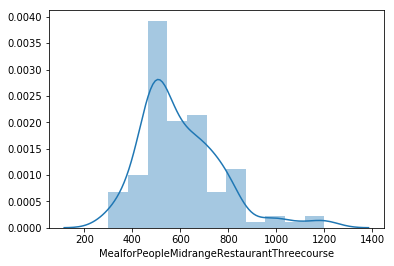

In [28]:
sns.distplot (df_costofliving['MealforPeopleMidrangeRestaurantThreecourse']) 


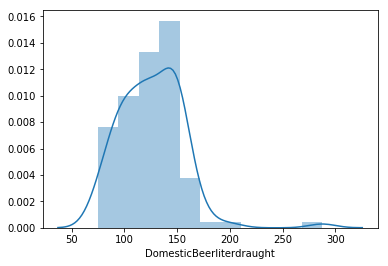

In [29]:
sns.distplot (df_costofliving['DomesticBeerliterdraught'])

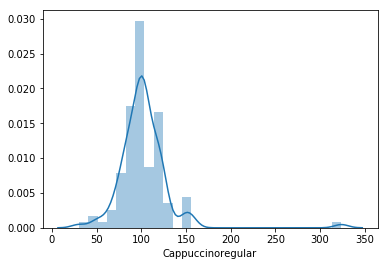

In [30]:
sns.distplot (df_costofliving['Cappuccinoregular'])

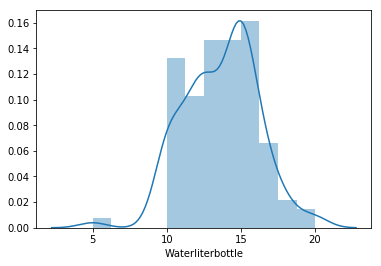

In [31]:
sns.distplot (df_costofliving['Waterliterbottle'])

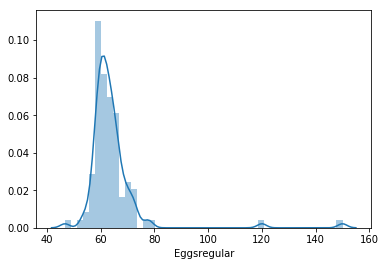

In [32]:
sns.distplot (df_costofliving['Eggsregular'])

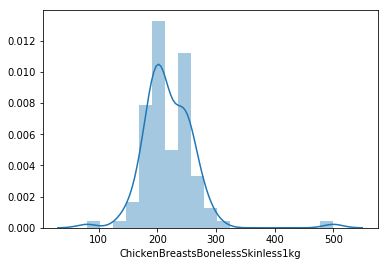

In [33]:
sns.distplot (df_costofliving['ChickenBreastsBonelessSkinless1kg'])

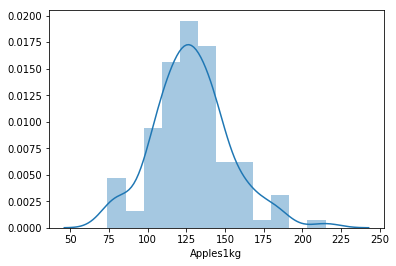

In [34]:
sns.distplot (df_costofliving['Apples1kg'])

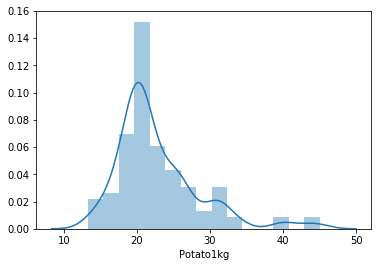

In [35]:
sns.distplot (df_costofliving['Potato1kg' ])

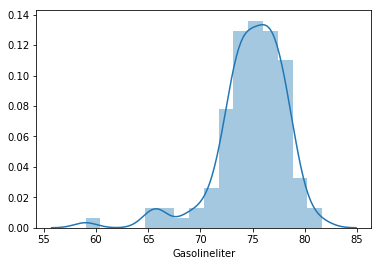

In [36]:
sns.distplot (df_costofliving['Gasolineliter'])

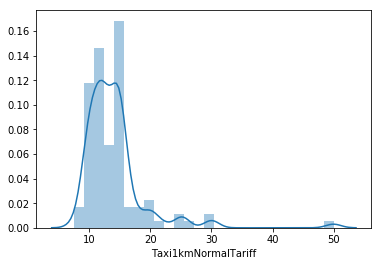

In [37]:
sns.distplot (df_costofliving['Taxi1kmNormalTariff'])

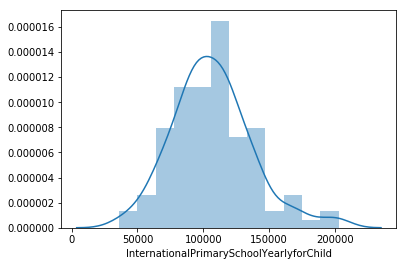

In [38]:
sns.distplot (df_costofliving['InternationalPrimarySchoolYearlyforChild'])

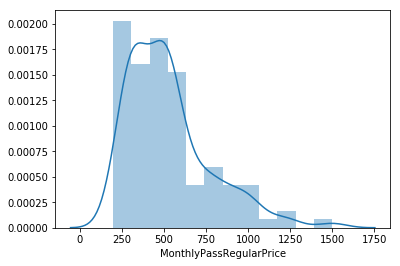

In [39]:
sns.distplot (df_costofliving['MonthlyPassRegularPrice'])

# From above distribution plots:
* MealforPeopleMidrangeRestaurantThreecourse 
  *Distribution*: 
* DomesticBeerliterdraught
  Distribution:
* Cappuccinoregular
  Distribution:
* Waterliterbottle
  Distribution:
* Eggsregular
  Distribution:
* ChickenBreastsBonelessSkinless1kg 
  Distribution:
* Apples1kg
  Distribution:
* Potato1kg
  Distribution:
* MonthlyPassRegularPrice
  Distribution:
* Taxi1kmNormalTariff
  Distribution:
* Gasolineliter
  Distribution:
* InternationalPrimarySchoolYearlyforChild
  Distribution:

# Box plots

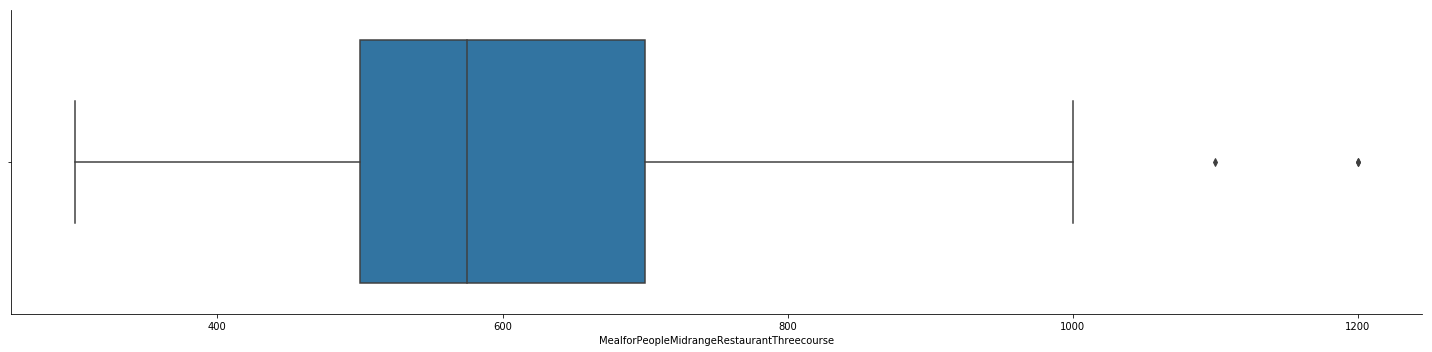

In [40]:
sns.catplot(x='MealforPeopleMidrangeRestaurantThreecourse',data=df_costofliving,kind='box',aspect=4)

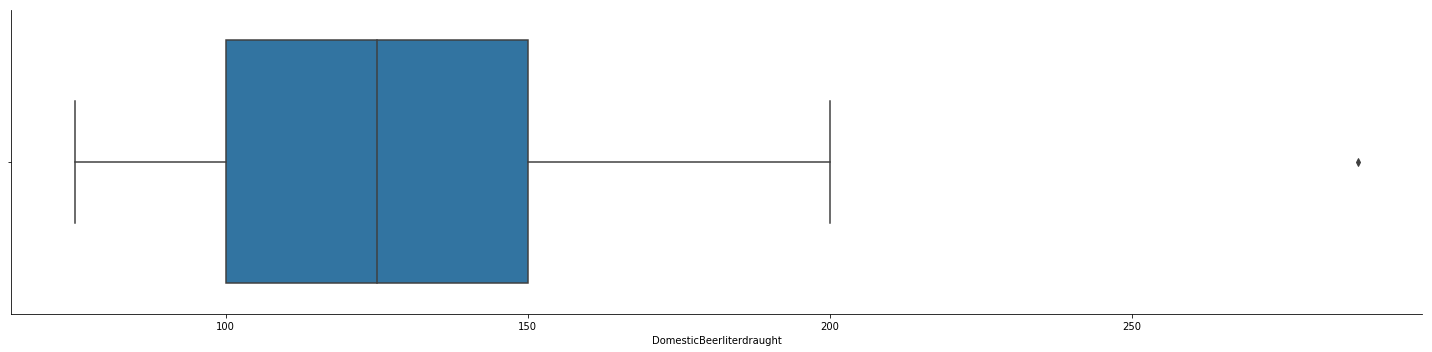

In [41]:
sns.catplot(x='DomesticBeerliterdraught',data=df_costofliving,kind='box',aspect=4)

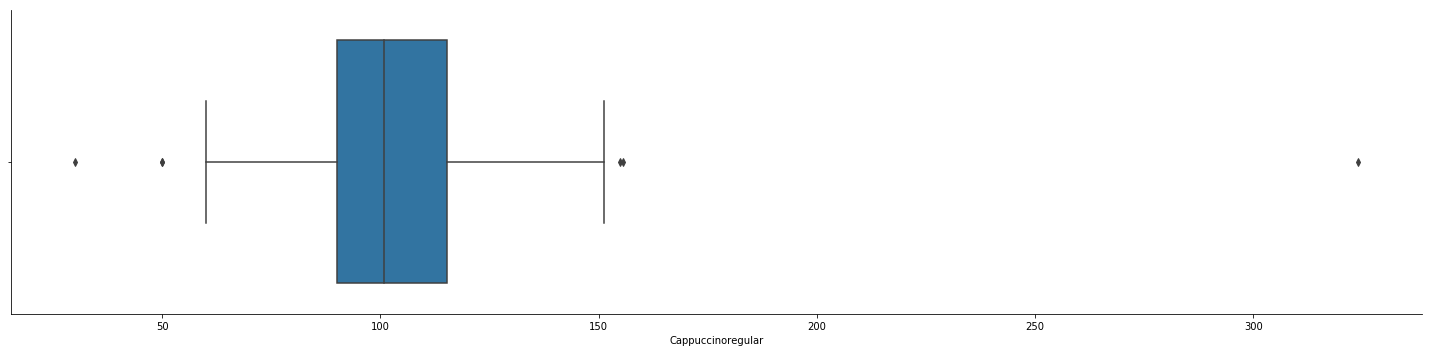

In [42]:
sns.catplot(x='Cappuccinoregular',data=df_costofliving,kind='box',aspect=4)

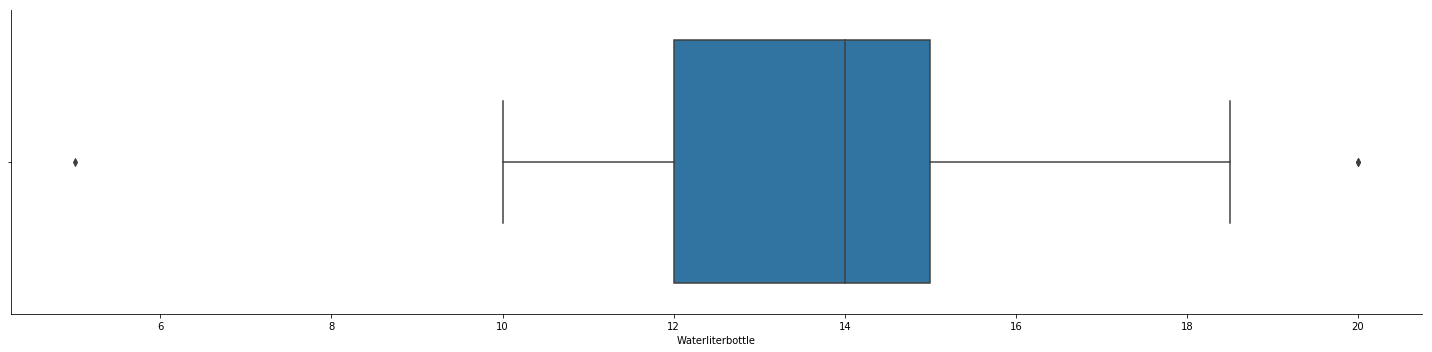

In [43]:
sns.catplot(x='Waterliterbottle',data=df_costofliving,kind='box',aspect=4)

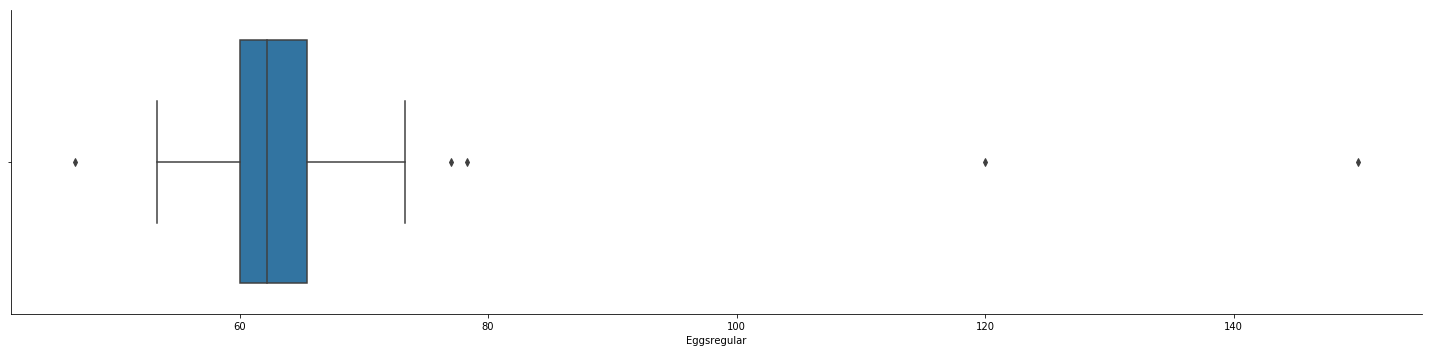

In [44]:
sns.catplot(x='Eggsregular',data=df_costofliving,kind='box',aspect=4)

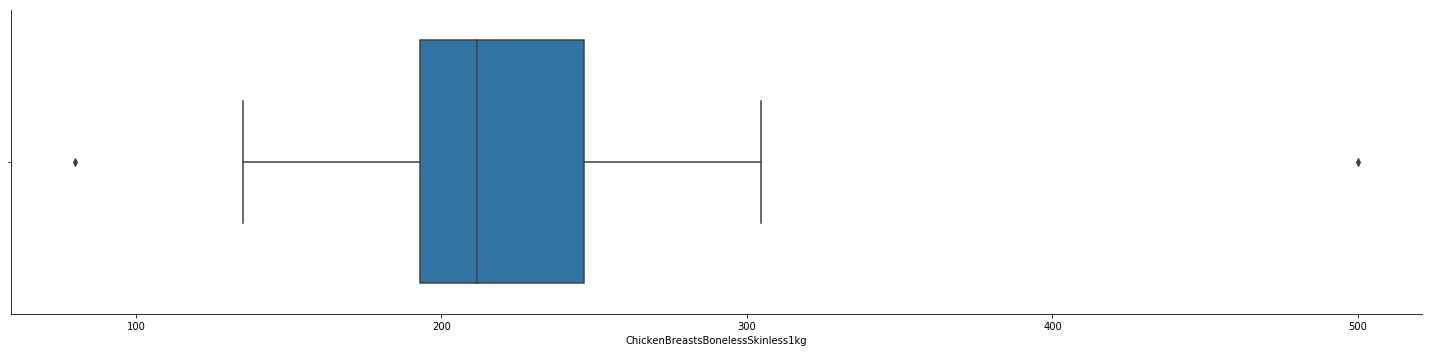

In [45]:
sns.catplot(x='ChickenBreastsBonelessSkinless1kg',data=df_costofliving,kind='box',aspect=4)

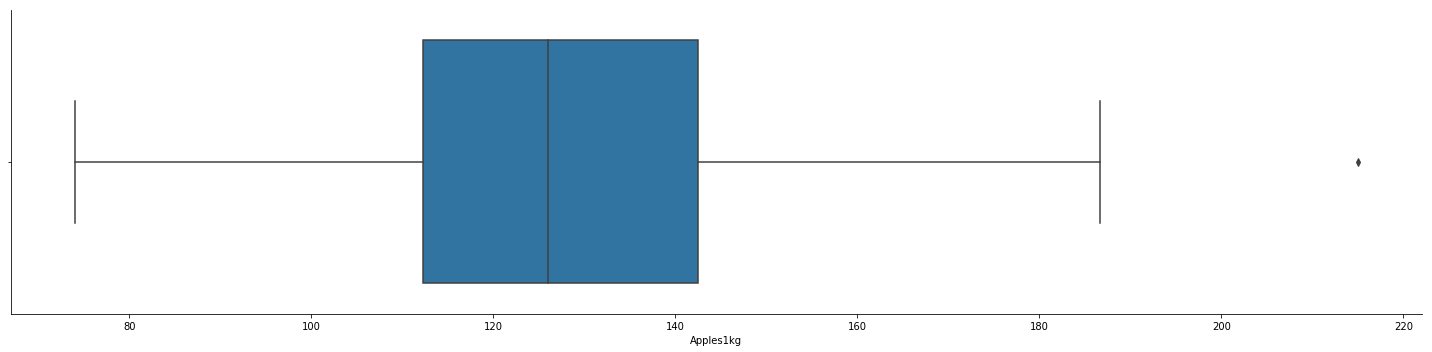

In [46]:
sns.catplot(x='Apples1kg',data=df_costofliving,kind='box',aspect=4)